### In Statsmodels

In [1]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [2]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        16:09:46   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


In [3]:
from sklearn.datasets import load_iris

In [56]:
df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)

df.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [57]:
df['species'] = sy
df = df[df['species'] != 'virginica' ]
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [58]:
dic = {'setosa' : 0, 'versicolor' : 1}
df['species'] = df['species'].map(dic)

In [59]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [60]:
model = sm.Logit.from_formula("species ~ sepal_length", df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.5368
Time:                        16:43:53   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113


In [83]:
dfx = df['sepal_length']
dfy = df['species']

In [85]:
df['predict'] = result.predict(dfx)

In [86]:
df['predict_01'] = np.array([1 if i > 0.5 else 0 for i in df.predict.values])

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.species, df.predict_01)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(df.species, df.predict_01))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89        50
          1       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [100]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))

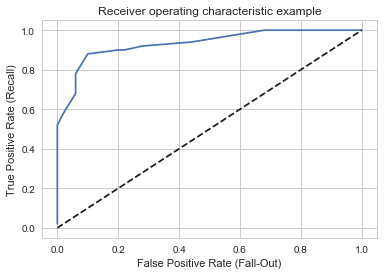

In [102]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()